In [2]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting


In [3]:
train_data_set = np.load("fashion_train.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [4]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_classes = []

for i in range(len(train_data_set)):
    train_classes.append(train_data_set[i][784])
      
train_classes = np.array(train_classes)

In [5]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp

In [6]:
len(cleaned_train_set[0])

784

## Cleaning the data

Our code has a few pixel values that are very close to 0 (thus background), that we remove to reduce the noise in our dataset.

In [7]:
# Cleaning values close to 0 to reduce noise in the images.

for i in cleaned_train_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0

In [9]:
cleaned_train_set_reshaped_std = standardized_train_data.reshape(-1, 28, 28)

In [10]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.
cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)

In [11]:
# Two simple functions for working with our data

def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()

    cloth_cat = train_classes[index_num]
    if cloth_cat == 0:
        print("0: This is a t-shirt/top")
    if cloth_cat == 1:
        print("1: This is a pair of trousers")
    if cloth_cat == 2:
        print("2: This is a pullover")
    if cloth_cat == 3:
        print("3: This is a dress")
    if cloth_cat == 4:
        print("4: This is a shirt")
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''  
    ze_val = 0
    on_val = 0
    tw_val = 0
    th_val = 0
    fo_val = 0
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

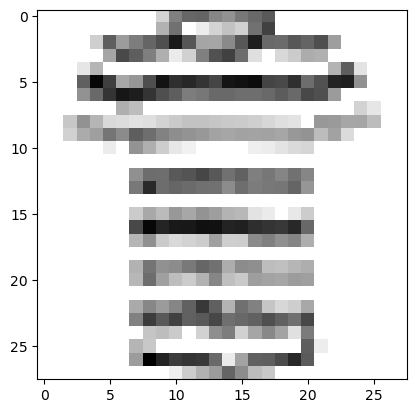

0: This is a t-shirt/top
There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [12]:
show_image(55)

count_categories(train_classes)

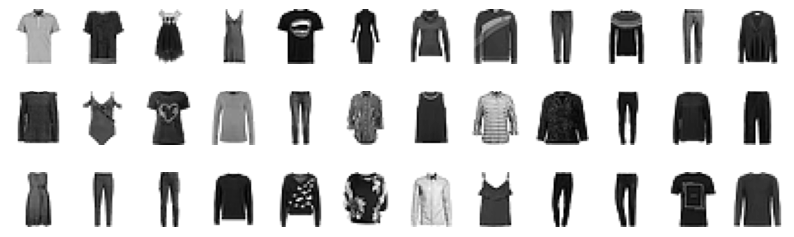

In [13]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')

In [14]:
cleaned_train_set_reshaped.shape

(10000, 28, 28)

## Plotting the data

Transformed data shape: (10000, 20)
Explained variance ratio: [0.32236381 0.16238261 0.07740525 0.04167387 0.03283027 0.02240922
 0.01942308 0.01783966 0.01497458 0.01273735 0.01136564 0.00970144
 0.00833338 0.00743689 0.00731606 0.00678157 0.00670585 0.0063861
 0.00566412 0.00504388]


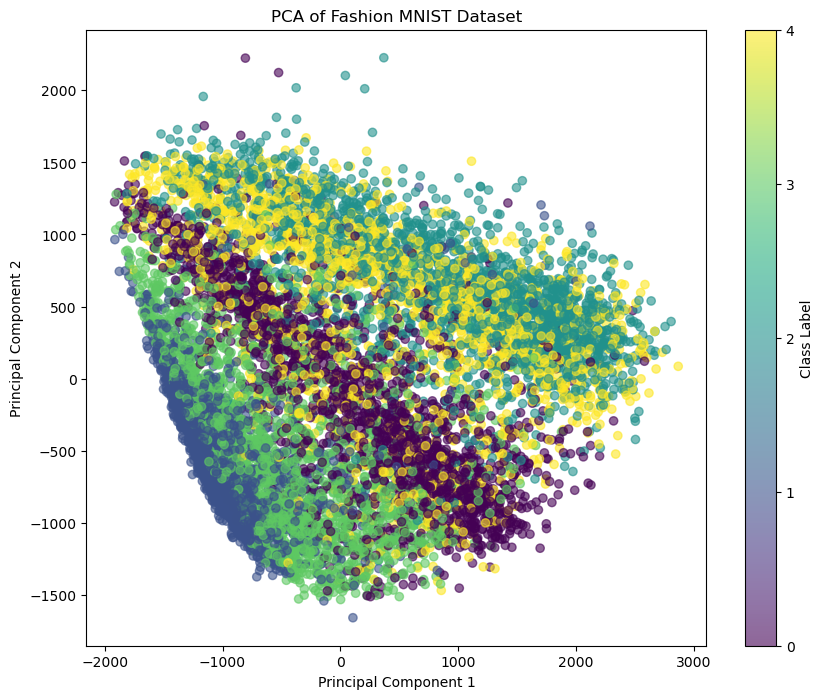

In [402]:
# Perform PCA
pca = PCA(n_components=20)  # You can adjust this number if needed
pca_train_result = pca.fit_transform(cleaned_train_set)

# Print the shapes and explained variance ratio
print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()


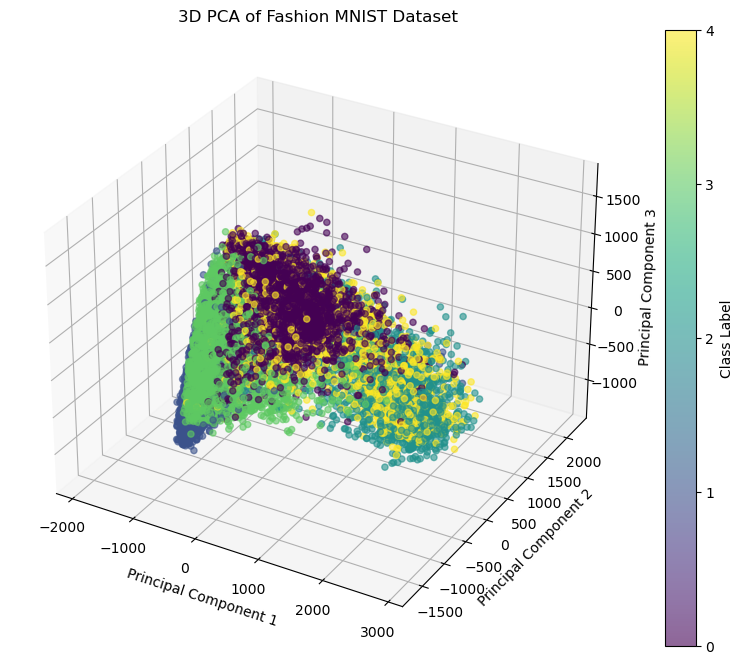

In [403]:
# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

The axes' values are very large. Not very useful and can lead to weird model behavior. Therefore, let's do:

## Dimensional reduction using PCA

In [37]:
# Standardize the data
scaler = StandardScaler()
standardized_train_data = scaler.fit_transform(cleaned_train_set)


In [67]:
# Time to find the right number of PCA components, as we want the components to explain 90% of the variance in total.
pca_components = 784
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(standardized_train_data)


In [78]:
pca_sum_list = [pca.explained_variance_ratio_[0]]
i = 1

while sum(pca_sum_list) < 0.90:
    pca_sum_list.append(pca.explained_variance_ratio_[0+i])
    i += 1

In [79]:
len(pca_sum_list)

112

Transformed data shape: (10000, 113)
Explained variance ratio: [0.22603368 0.13609817 0.06358945 0.05010653 0.03062702 0.02909299
 0.02197392 0.01885609 0.01473657 0.01421748 0.01296357 0.0123481
 0.01009283 0.00926477 0.00884594 0.00841715 0.00791795 0.00741845
 0.00719492 0.00682203 0.00638955 0.0062316  0.00593573 0.00557688
 0.005205   0.0050137  0.00493918 0.00478883 0.00455162 0.0044037
 0.00420612 0.00405006 0.00396849 0.00389328 0.00379286 0.00364704
 0.00359467 0.00354001 0.00334748 0.00325407 0.00318967 0.00314184
 0.00302833 0.00292202 0.00276835 0.00273279 0.00264285 0.00259013
 0.00245172 0.00244808 0.00234339 0.00230498 0.0022179  0.00216618
 0.00212277 0.00205754 0.00203591 0.00196847 0.00193597 0.00185979
 0.00183947 0.00179781 0.00176872 0.00172622 0.00168358 0.0016566
 0.00163738 0.00159348 0.00158559 0.00152927 0.00149169 0.00148579
 0.00147701 0.00146026 0.00143369 0.00142809 0.00140901 0.00136809
 0.00134742 0.00133054 0.00130596 0.0012799  0.0012632  0.00125834
 0

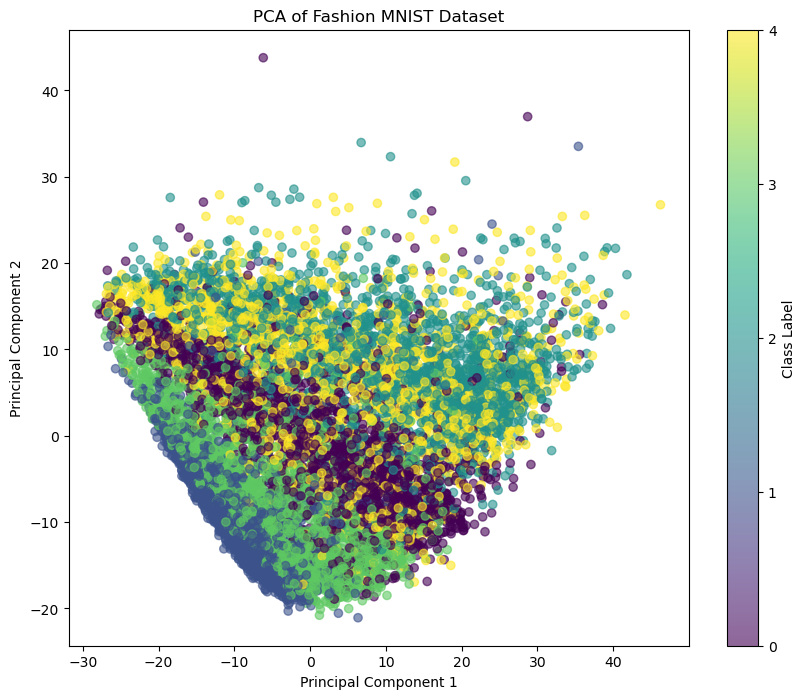

In [36]:
# Print the shapes and explained variance ratio
print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()


In [ ]:
# At 113 principal components. 
sum(pca.explained_variance_ratio_)

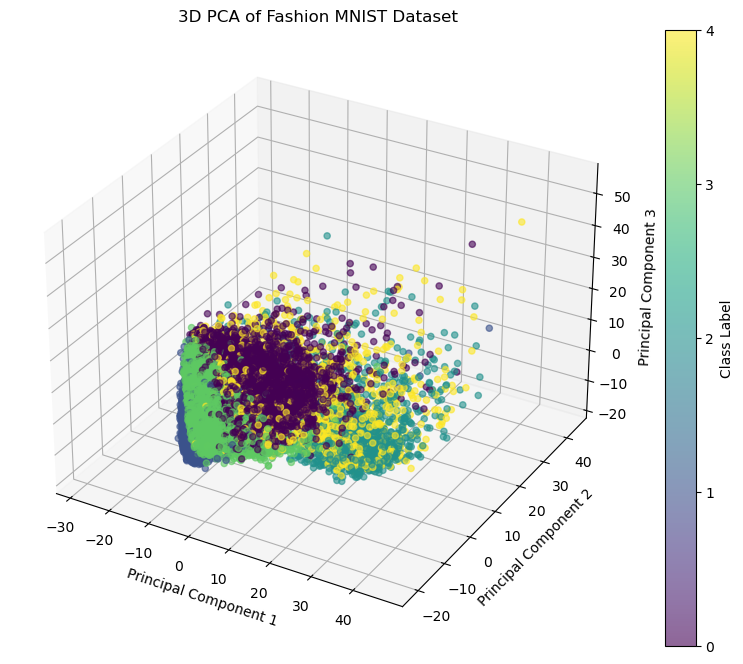

In [410]:

# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

## Removing Outliers using IQR and plotting with KMeans
Below we clean up the data using IQR.

In [414]:
def remove_outliers_iqr(data, classifiers):
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(pca_3d, 25, axis=0)
    Q3 = np.percentile(pca_3d, 75, axis=0)
    
    # Compute IQR
    IQR = Q3 - Q1
    
    # Define bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a boolean mask for non-outliers
    mask = ~((data < lower_bound) | (data > upper_bound)).any(axis=1)
    
    # Filter data using the mask
    filtered_data = data[mask]
    classifiers_data = classifiers[mask]
    
    return filtered_data, mask, classifiers_data

# Example usage with PCA transformed data
# Assuming pca_train_result is your PCA data
cleaned_data_3d, outlier_mask, cleaned_classifiers_3d = remove_outliers_iqr(pca_3d, train_classes)

# Check shapes before and after
print("Original data shape:", pca_3d.shape)
print("Data shape after outlier removal:", cleaned_data_3d.shape)

Original data shape: (10000, 3)
Data shape after outlier removal: (9705, 3)


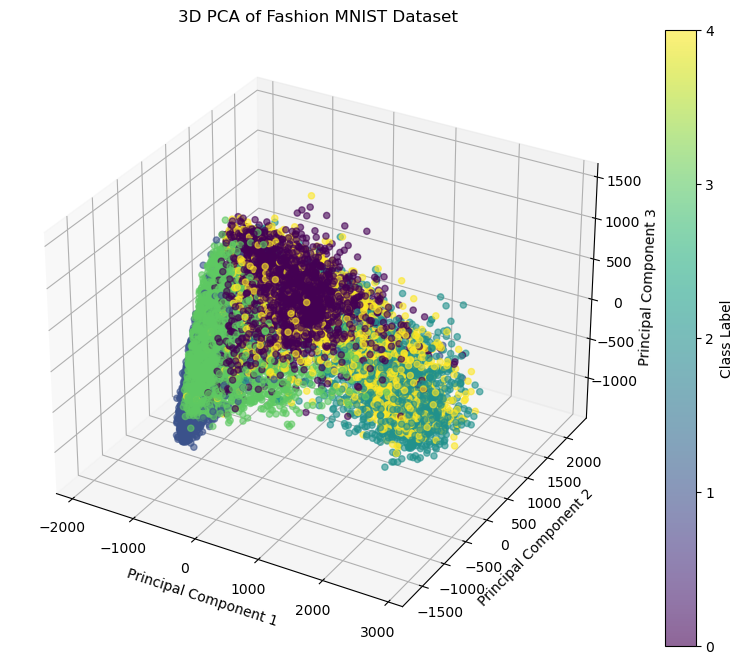

In [405]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(cleaned_data_3d[:, 0], cleaned_data_3d[:, 1], cleaned_data_3d[:, 2], c=cleaned_classifiers_3d, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

In [406]:
# KMeans clustering of the dataset

from sklearn.cluster import KMeans

k_means_train_test = KMeans(n_clusters = 5,random_state=42, n_init='auto').fit(cleaned_data_3d)

k_labels = k_means_train_test.labels_
k_centers = k_means_train_test.cluster_centers_

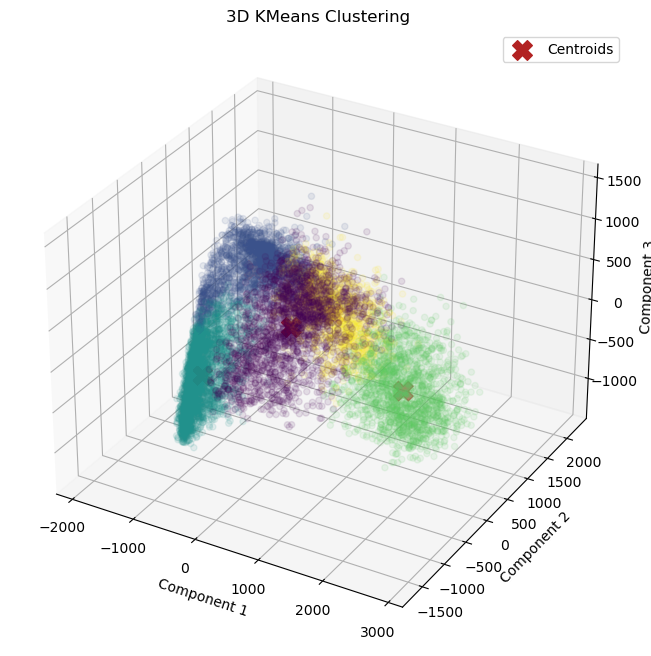

In [407]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with their assigned clusters
scatter = ax.scatter(cleaned_data_3d[:, 0], cleaned_data_3d[:, 1], cleaned_data_3d[:, 2], c=k_labels, alpha=0.1, zorder = -1)

# Plot the cluster centers
ax.scatter(k_centers[:, 0], k_centers[:, 1], k_centers[:, 2], c='firebrick', s=200, marker='X', label='Centroids', zorder = 12.6)

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D KMeans Clustering')
ax.legend()

plt.show()

In [ ]:
# TO BE DONE: Find a method that gives the lowest test error rate (and not training error rate) (p. 35) Lets get started on KNN
# 

In [379]:
# Load training data
X_train, y_train = cleaned_train_set[["x1", "x2"]], cleaned_train_set["y"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [386]:
y_train = train_classes

In [383]:
cleaned_train_set[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  41,  92, 172, 100,
        23,  22,  33, 104, 136,  93,  44,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 119, 166, 177, 159,
       153, 227, 232, 215, 240, 227, 156, 162, 180, 175, 102,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 166, 143, 133,
       126, 134, 121, 102, 146, 171, 160, 106, 113, 130, 130, 136, 151,
       159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 139,
       123, 130, 129, 133, 133, 134, 116, 108, 113, 129, 135, 136, 131,
       128, 126, 150,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       151, 128, 126, 129, 130, 131, 130, 129, 131, 135, 134, 130, 130,
       131, 130, 130, 130, 139, 138,   0,   0,   0,   0,   0,   0,   0,
         0,  44, 148, 129, 126, 130, 133, 129, 129, 130, 130, 129, 129,
       130, 129, 131, 130, 131, 125, 146, 165,   0,   0,   0,   0,   0,
         0,   0,   0,  93, 156, 148, 124, 126, 126, 128, 128, 12

In [378]:
# Load training data
X_train, y_train = train_data_set[["x1", "x2"]], train_data_set["y"]

# Load test data
test = pd.read_csv("Ex1-test.csv")
X_test, y_test = test[["x1", "x2"]],test["y"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices